In [1]:
!mkdir frames

In [ ]:
!pip install tensorflow keras_cv --upgrade --quiet
!pip install keras_core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 118.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 41.1 MB/s eta 0:00:00


In [ ]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

Using TensorFlow backend


In [ ]:
keras.mixed_precision.set_global_policy("float32")
model = keras_cv.models.StableDiffusion(jit_compile = True, img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
import pandas as pd

In [ ]:
prompts = pd.read_csv('./descriptions.csv')

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
def save_img(image,frame):
    pil_image = Image.fromarray(np.uint8(image))
    output_path = f"frames/{frame}.png"
    pil_image.save(output_path)
    print(f"Saved generated image to {output_path}")

In [ ]:
frame = 1
for i in range(prompts.shape[0]):
    try:
        images = model.text_to_image(prompts['Description'][i], batch_size=1)
        save_img(images[0], frame)
        frame += 1
    except:
        break

50/50 [==============================] - 43s 849ms/step
Saved generated image to frames/1.png
50/50 [==============================] - 40s 797ms/step
Saved generated image to frames/2.png
50/50 [==============================] - 41s 826ms/step
Saved generated image to frames/3.png
50/50 [==============================] - 39s 784ms/step
Saved generated image to frames/4.png
50/50 [==============================] - 40s 803ms/step
Saved generated image to frames/5.png
50/50 [==============================] - 41s 814ms/step
Saved generated image to frames/6.png
50/50 [==============================] - 40s 811ms/step
Saved generated image to frames/7.png
50/50 [==============================] - 39s 787ms/step
Saved generated image to frames/8.png
50/50 [==============================] - 41s 805ms/step
Saved generated image to frames/9.png
50/50 [==============================] - 42s 847ms/step
Saved generated image to frames/10.png


ValueError: ignored

In [ ]:
for i in range(prompts.shape[0]-frame):
    images = model.text_to_image(prompts['Description'][i], batch_size=1)
    save_img(images[0], frame)
    frame += 1

50/50 [==============================] - 48s 957ms/step
Saved generated image to frames/11.png
50/50 [==============================] - 40s 797ms/step
Saved generated image to frames/12.png
50/50 [==============================] - 41s 814ms/step
Saved generated image to frames/13.png
50/50 [==============================] - 43s 872ms/step
Saved generated image to frames/14.png
50/50 [==============================] - 42s 853ms/step
Saved generated image to frames/15.png
50/50 [==============================] - 40s 807ms/step
Saved generated image to frames/16.png
50/50 [==============================] - 39s 778ms/step
Saved generated image to frames/17.png
50/50 [==============================] - 40s 810ms/step
Saved generated image to frames/18.png


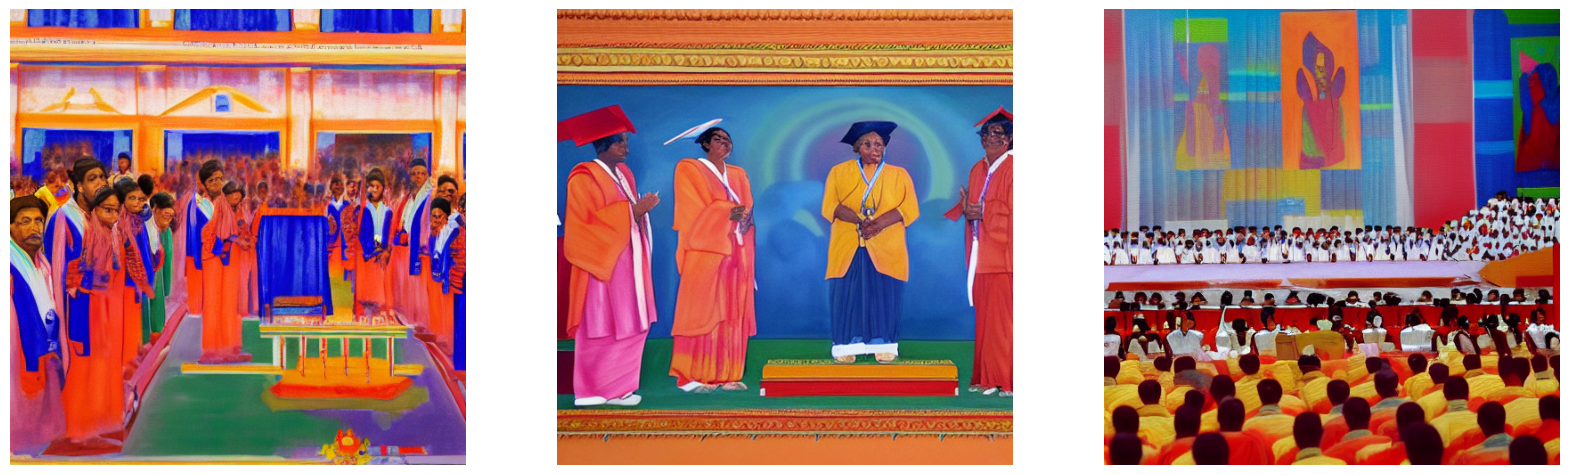

In [ ]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)